In [1]:
# importing required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Reading the CSV file

df=pd.read_csv('Iris.csv')
df=df.drop(['Species','Id'],axis=1)
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
print(df.shape)

(150, 4)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Standardize the Data

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms.

In [6]:
# Data-Preprossing : Standardizing the data

from sklearn.preprocessing import StandardScaler

std_data=StandardScaler().fit_transform(df)
std_data

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [7]:
std_data.shape

(150, 4)

In [8]:
# finding co-variance matrix i.e., X^T * X

X=std_data
print(X.shape)

#matrix multiplication using numpy
co_var_mat=np.matmul(X.T,X)

print(co_var_mat.shape)

(150, 4)
(4, 4)


In [9]:
co_var_mat

array([[150.        , -16.40538749, 130.7631236 , 122.69304501],
       [-16.40538749, 150.        , -63.07741446, -53.48161344],
       [130.7631236 , -63.07741446, 150.        , 144.41356456],
       [122.69304501, -53.48161344, 144.41356456, 150.        ]])

In [10]:
#Finding eigen values and eigen vectors
#for projecting onto a 2d space

from scipy.linalg import eigh

# the parameter 'eigvals' if defined (low value to high value)
# eigh function will return the eigen values in asending order
# this code generates only the top 2 (3 and 4) eigen values

values,vectors=eigh(co_var_mat,eigvals=(2,3))
print(vectors.shape)

(4, 2)


In [11]:
values

array([138.18313961, 436.62271256])

In [12]:
vectors

array([[-0.37231836,  0.52237162],
       [-0.92555649, -0.26335492],
       [-0.02109478,  0.58125401],
       [-0.06541577,  0.56561105]])

In [13]:
#Converting eigen vectors from 784X2 t0 2X784

vectors=vectors.T
print(vectors.shape)

#vectors[1] represent the eigen vector corresponding 1st principal component
#vectors[0] represent the eigen vector corresponding 2nd principal component
vectors

(2, 4)


array([[-0.37231836, -0.92555649, -0.02109478, -0.06541577],
       [ 0.52237162, -0.26335492,  0.58125401,  0.56561105]])

In [14]:
#projecting the original data sample on the plane
#formed by two principal eigen vectors by vector vector multiplication

new_cor=np.matmul(vectors,X.T)     #(2,784) X (784,15000) = (2,15000)
new_cor.shape

(2, 150)

In [15]:
new_cor=new_cor.T
new_cor

array([[-5.05703903e-01, -2.26454173e+00],
       [ 6.55404729e-01, -2.08642550e+00],
       [ 3.18477311e-01, -2.36795045e+00],
       [ 5.75367713e-01, -2.30419716e+00],
       [-6.74767397e-01, -2.38877749e+00],
       [-1.51854856e+00, -2.07053681e+00],
       [-7.45626750e-02, -2.44571134e+00],
       [-2.47613932e-01, -2.23384186e+00],
       [ 1.09514636e+00, -2.34195768e+00],
       [ 4.48629048e-01, -2.18867576e+00],
       [-1.07059558e+00, -2.16348656e+00],
       [-1.58587455e-01, -2.32737775e+00],
       [ 7.09118158e-01, -2.22408272e+00],
       [ 9.38281982e-01, -2.63971626e+00],
       [-1.88997851e+00, -2.19229151e+00],
       [-2.72237108e+00, -2.25146521e+00],
       [-1.51375028e+00, -2.20275048e+00],
       [-5.14304308e-01, -2.19017916e+00],
       [-1.43111071e+00, -1.89407429e+00],
       [-1.15803343e+00, -2.33994907e+00],
       [-4.30465163e-01, -1.91455639e+00],
       [-9.52457317e-01, -2.20464540e+00],
       [-4.89517027e-01, -2.77416979e+00],
       [-1.

In [16]:
#creating a new data frame for plotting the labeled points

df_f=pd.DataFrame(data=new_cor,columns=('PC2','PC1'))
df_f.head()

,PC2,PC1
0,-0.505704,-2.264542
1,0.655405,-2.086426
2,0.318477,-2.367950
3,0.575368,-2.304197
4,-0.674767,-2.388777


In [17]:
df_f.shape

(150, 2)

In [18]:
# import KMeans
from sklearn.cluster import KMeans

In [19]:
no_clus=int(input("Enter the number of clusters"))

# create kmeans object
kmeans = KMeans(n_clusters=no_clus)
# fit kmeans object to data
kmeans.fit(df_f)

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km1 = kmeans.fit_predict(df_f)

Enter the number of clusters3
[[-0.29222482 -2.22019328]
 [-0.65217008  1.71890108]
 [ 0.79925263  0.61198392]]


In [20]:
y_km1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

In [21]:
df_f['Cluster']=y_km1
df_f.head(5)

,PC2,PC1,Cluster
0,-0.505704,-2.264542,2
1,0.655405,-2.086426,2
2,0.318477,-2.367950,2
3,0.575368,-2.304197,2
4,-0.674767,-2.388777,2


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


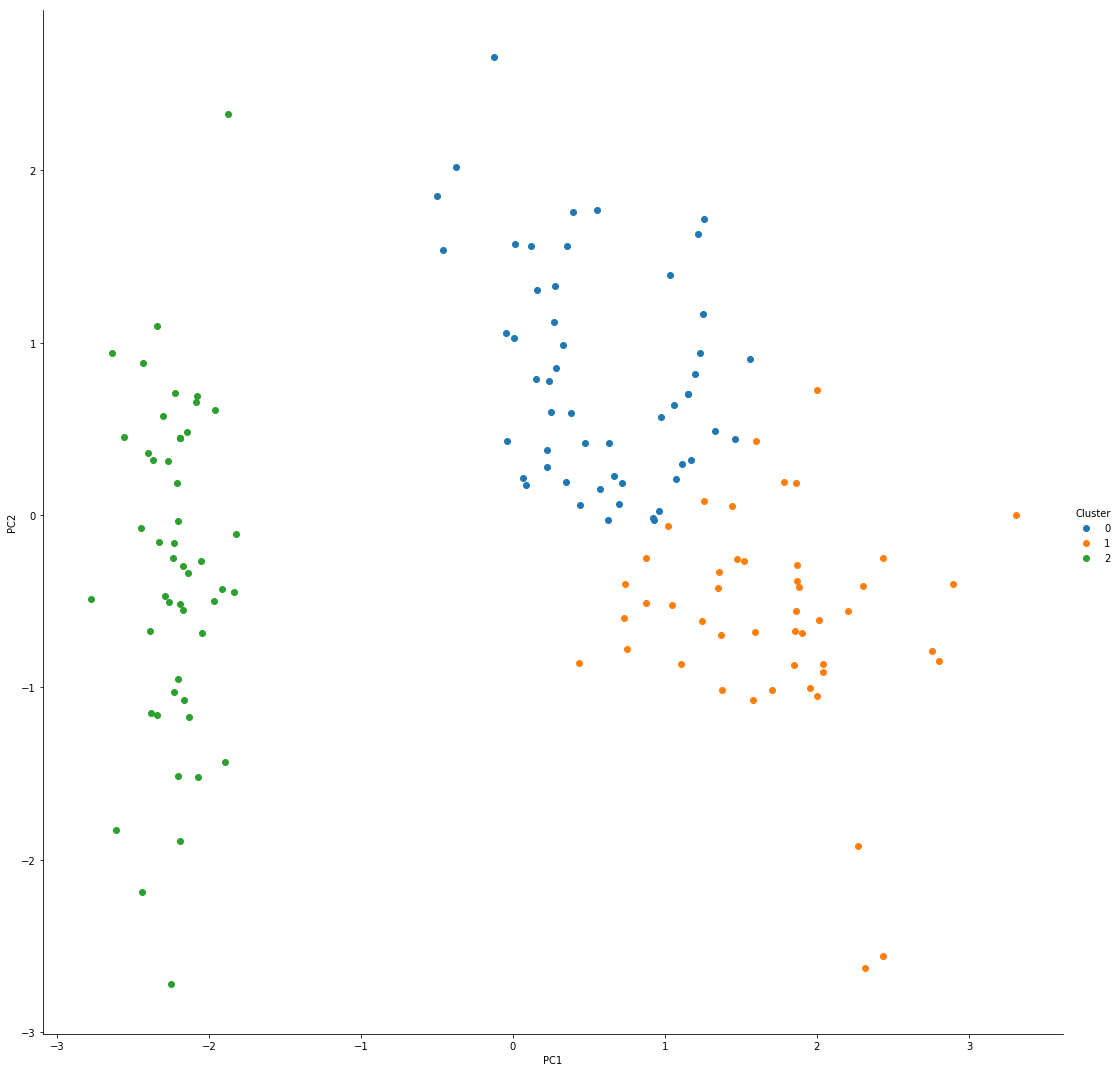

In [22]:
#ploting the 2nd data points with seaborn

import seaborn as sn

sn.FacetGrid(df_f,hue='Cluster',size=15).map(plt.scatter,'PC1','PC2').add_legend()
plt.show()

# Original Attributes

In [23]:
# create kmeans object
kmeans = KMeans(n_clusters=no_clus)
# fit kmeans object to data
kmeans.fit(df)

# print location of clusters learned by kmeans object
print(kmeans.cluster_centers_)
# save new clusters for chart
y_km = kmeans.fit_predict(df)

[[6.85       3.07368421 5.74210526 2.07105263]
 [5.006      3.418      1.464      0.244     ]
 [5.9016129  2.7483871  4.39354839 1.43387097]]


Cluster for original dataset

In [24]:
y_km

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

Cluster for PCA attributes

In [25]:
y_km1

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])